In [5]:
import pandas as pd

In [7]:
data = pd.read_csv("/content/Retail and wherehouse Sale.csv")

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,SALES_RATIO
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,0.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,0.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,0.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,0.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82


In [8]:
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


# Finding NULL Values


In [10]:
data.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


# Handling NULL Values

In [11]:
data["RETAIL SALES"] = data["RETAIL SALES"].fillna(0)

In [12]:
data["SUPPLIER"] = data["SUPPLIER"].fillna("Unknown Supplier")

In [13]:
data.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


# Performing groupby operations to extract meaningful sales insights

In [14]:
sales_by_item_type = data.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES','RETAIL TRANSFERS']].sum().sort_values(by=['WAREHOUSE SALES','RETAIL SALES',], ascending=False)


print(sales_by_item_type)

              RETAIL SALES  WAREHOUSE SALES  RETAIL TRANSFERS
ITEM TYPE                                                    
BEER              59538.76        697279.68          55729.83
WINE              59688.84        119459.93          58629.13
LIQUOR            81742.85          8796.90          79599.70
KEGS                  0.00          8400.00              0.00
NON-ALCOHOL        6824.62          2438.42           2934.08
STR_SUPPLIES        345.60             0.00            895.00
REF                  46.27         -1329.00             34.00
DUNNAGE               0.00        -12115.00              0.00


In [38]:
data['MONTH_NAME'] = pd.to_datetime(data['MONTH'], format='%m').dt.month_name()
# converting the month number into month name (eg: 1 - january)

In [44]:
# sales by month
sales_by_year = data.groupby(['YEAR','MONTH_NAME'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().sort_values(by=['WAREHOUSE SALES','RETAIL SALES',], ascending=False)
print(sales_by_year)

                 RETAIL SALES  WAREHOUSE SALES
YEAR MONTH_NAME                               
2020 July            94538.96        418094.42
     January         74318.77        284114.72
     March           34523.90        113305.22
     September        4805.31          7416.57


In [16]:
# count of suppliers per item
count_suppliers_by_item_type = data.groupby('ITEM TYPE')['SUPPLIER'].nunique().sort_values(ascending=False)
print(count_suppliers_by_item_type)

ITEM TYPE
WINE            191
LIQUOR           96
BEER             78
KEGS             44
NON-ALCOHOL      19
STR_SUPPLIES      4
DUNNAGE           3
REF               2
Name: SUPPLIER, dtype: int64


In [17]:
# count of products per item
count_products = data.groupby('ITEM TYPE')['ITEM DESCRIPTION'].nunique().sort_values(ascending=False)
print(count_products)


ITEM TYPE
WINE            9838
LIQUOR          2853
BEER            2368
KEGS             535
NON-ALCOHOL      105
STR_SUPPLIES      25
DUNNAGE            4
REF                4
Name: ITEM DESCRIPTION, dtype: int64


In [34]:
# sales by month for each item (using pivot)
pivot = data.pivot_table(values=['RETAIL SALES','WAREHOUSE SALES'], index=['ITEM TYPE','MONTH_NAME'], aggfunc='sum')
print(pivot)


                         RETAIL SALES  WAREHOUSE SALES
ITEM TYPE    MONTH_NAME                               
BEER         January         18241.05        231515.04
             July            28907.53        363497.98
             March           11742.04         96890.43
             September         648.14          5376.23
DUNNAGE      January             0.00         -5232.00
             July                0.00         -2207.00
             March               0.00         -2800.00
             September           0.00         -1876.00
KEGS         January             0.00          5200.00
             July                0.00          2096.00
             March               0.00           815.00
             September           0.00           289.00
LIQUOR       January         29345.39          4503.05
             July            35430.95          3049.92
             March           14174.66           914.93
             September        2791.85           329.00
NON-ALCOHO

In [19]:
# Loss-making products
losses = data[data['WAREHOUSE SALES'] < 0]
result = losses[['ITEM DESCRIPTION','WAREHOUSE SALES']]
print(result)


                                        ITEM DESCRIPTION  WAREHOUSE SALES
405                                EMPTY WINE KEG - KEGS           -12.00
822                                EMPTY 1/2 KEG (30.00)         -3999.00
1011                               EMPTY 1/6 KEG (30.00)          -934.00
1552   J DE TELMONT SANS SOUFRE AJOUTE BRUT CHAMP - 7...            -1.00
2144                       ERDINGER HEFE WEISSE 50L 1/2K            -1.00
...                                                  ...              ...
27229                                 WILLM RIES - 375ML            -1.00
27534                  ELYSIAN NIGHT OWL PUMPKIN 1/2 KEG            -1.00
28359          JOSEPH MELLOT SANCERRE BLC KOSHER - 750ML            -1.00
29105                    CHEVAL NOIR ST. EMILION - 750ML            -1.00
29415                     TARAPACA GRAN RESA RED - 750ML            -0.08

[76 rows x 2 columns]


In [20]:
#10 sucessful supliers by retail sales
top10_suppliers = data.groupby('SUPPLIER')['RETAIL SALES'].sum().nlargest(10).reset_index()
print(top10_suppliers)

                       SUPPLIER  RETAIL SALES
0      DIAGEO NORTH AMERICA INC      13840.54
1            E & J GALLO WINERY      12742.24
2            ANHEUSER BUSCH INC      10091.64
3          CONSTELLATION BRANDS       9931.78
4            JIM BEAM BRANDS CO       9845.79
5                 CROWN IMPORTS       9341.80
6                    SAZERAC CO       7739.14
7        MILLER BREWING COMPANY       7737.55
8               BACARDI USA INC       6121.70
9  HEAVEN HILL DISTILLERIES INC       6075.45


In [21]:
#finding sales ratio
data['SALES_RATIO'] = data['RETAIL SALES'] / (data['WAREHOUSE SALES'] + 1)

In [22]:
ratio = data.groupby('ITEM TYPE')['SALES_RATIO'].mean().sort_values(ascending=False)
ratio
# A SALES_RATIO Which shows infinite indicates the item is sold very high in warehouse compared to retail.
# A SALES_RATIO of greater than 0 indicates more sales in retail compared to warehouse
# A SALES_RATIO of zero means there are no retail sales, or minimal sales in warehouse.
# This ratio helps us understand whether an item is more retail-focused or warehouse-focused.

,SALES_RATIO
ITEM TYPE,
BEER,inf
WINE,inf
NON-ALCOHOL,24.059366
LIQUOR,8.189764
REF,5.783750
STR_SUPPLIES,5.485714
KEGS,0.000000
DUNNAGE,0.000000


In [23]:
# suming retail and warehouse sales for each item description
total_sales = data.groupby('ITEM DESCRIPTION')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

total_sales['TOTAL SALES'] = total_sales['RETAIL SALES'] + total_sales['WAREHOUSE SALES']

# top 10 products by toatl sales(retail+warehouse)
top10_items = total_sales.sort_values(by='TOTAL SALES', ascending=False).head(10)
print(top10_items)


                                      RETAIL SALES  WAREHOUSE SALES  \
ITEM DESCRIPTION                                                      
CORONA EXTRA LOOSE NR - 12OZ               2845.00         43330.50   
HEINEKEN LOOSE NR - 12OZ                   2096.00         22599.88   
MODELO ESPECIAL 24 LOOSE NR - 12OZ          795.00         19355.00   
CORONA EXTRA 2/12 NR - 12OZ                1105.00         19016.50   
HEINEKEN 2/12 NR - 12OZ                     806.23         14495.67   
MODELO ESPECIAL SUITCASE CANS - 12OZ        360.00         12399.84   
MILLER LITE 30PK CAN - 12OZ                1045.00         11648.40   
CORONA EXTRA 18PK NR - 12OZ                  11.00         10950.72   
CORONA EXTRA 4/6 NR - 12OZ                  490.83          9438.21   
BUD LIGHT 30PK CAN                          958.00          8583.97   

                                      TOTAL SALES  
ITEM DESCRIPTION                                   
CORONA EXTRA LOOSE NR - 12OZ             46

# Visualization Using Matplotlib & Seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


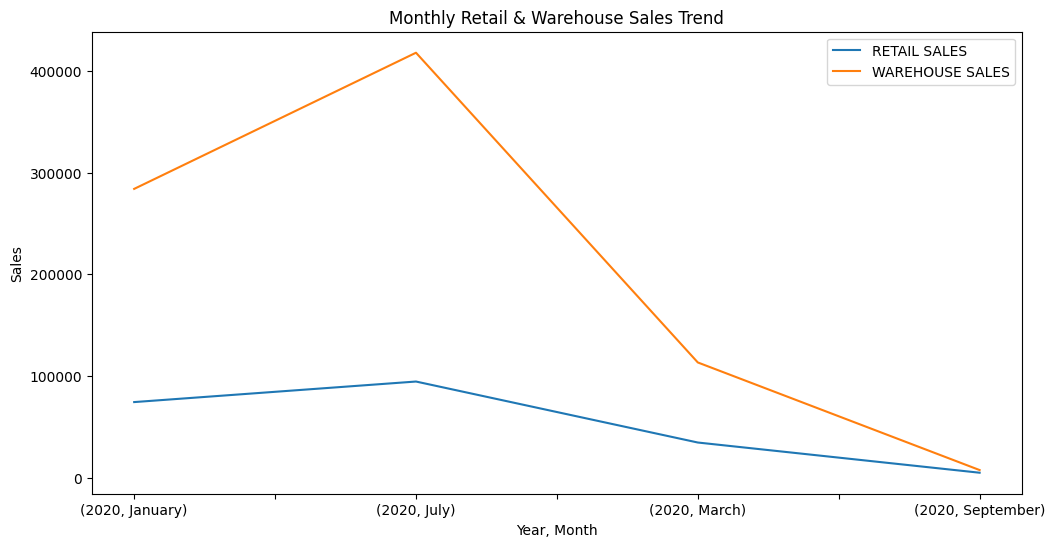

In [35]:
monthly_sales = data.groupby(['YEAR','MONTH_NAME'])[['RETAIL SALES','WAREHOUSE SALES']].sum()
monthly_sales.plot(figsize=(12,6))
plt.title('Monthly Retail & Warehouse Sales Trend')
plt.xlabel('Year, Month')
plt.ylabel('Sales')
plt.show()

# it shows the sales trend of warhouse & retail over months

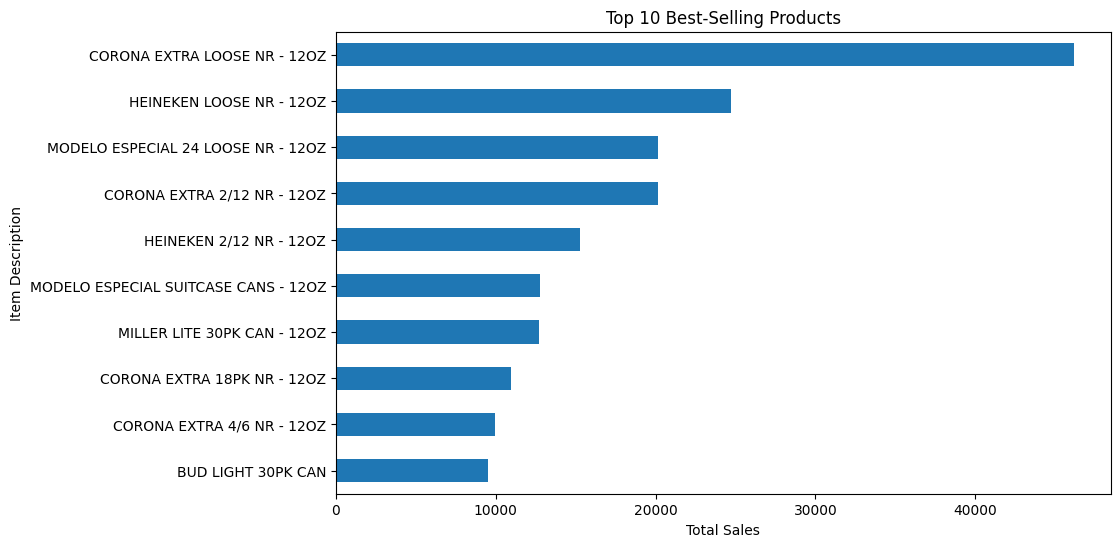

In [25]:
top10_items['TOTAL SALES'].plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Item Description')
plt.gca().invert_yaxis()
plt.show()

# top 10 products by toatl sales

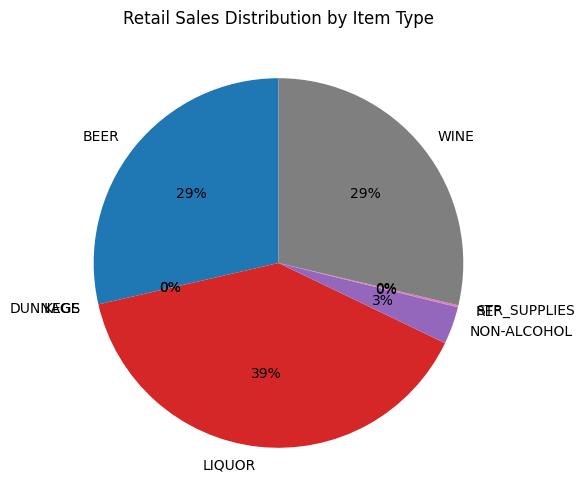

In [26]:
sales_by_type = data.groupby('ITEM TYPE')['RETAIL SALES'].sum()
plt.figure(figsize=(12,6))
plt.pie(sales_by_type, labels=sales_by_type.index, autopct='%1.0f%%', startangle=90)
plt.title('Retail Sales Distribution by Item Type')
plt.show()

# retail sales distribution by item

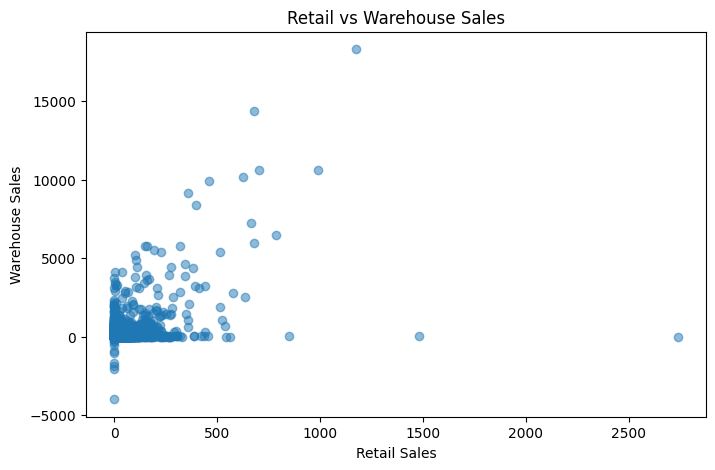

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(data['RETAIL SALES'], data['WAREHOUSE SALES'], alpha=0.5)
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.title('Retail vs Warehouse Sales')
plt.show()


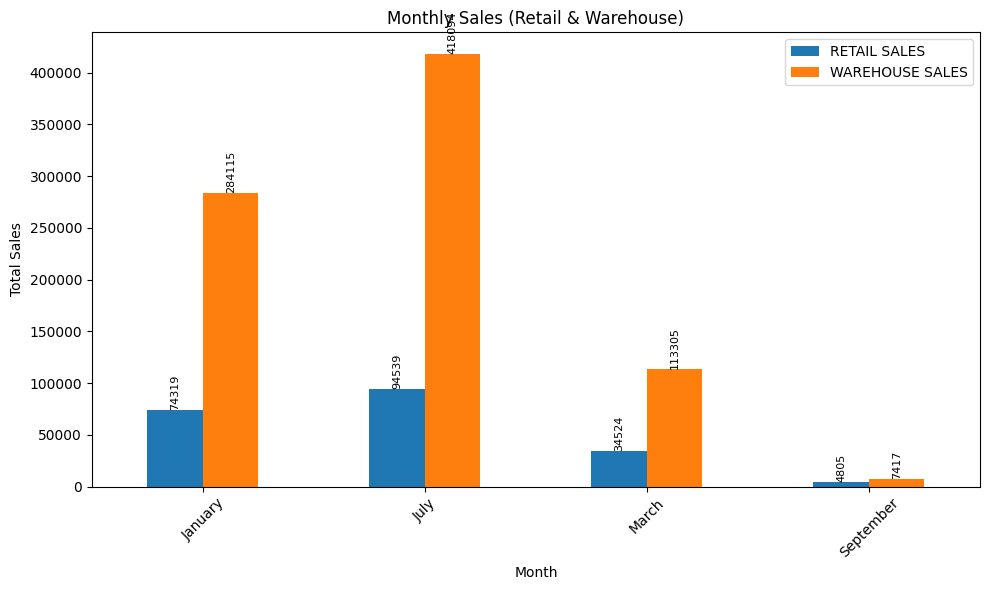

In [42]:
monthly_sales = data.groupby('MONTH_NAME')[['RETAIL SALES','WAREHOUSE SALES']].sum()

ax = monthly_sales.plot(kind='bar', figsize=(10,6))
plt.title("Monthly Sales (Retail & Warehouse)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# this bar chart shows the total sales by month wise